In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venkat\AppData\Roaming\nltk_data...


True

In [4]:
!pip install wordcloud

## Text Classification

### Sentiment Analysis , Supervised

In [11]:
imdb = pd.read_csv('E:/Term3/Unstructured/imdb_sentiment.csv')

In [12]:
imdb.head(5)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [ ]:
## Supervised way of analysis

In [16]:
%matplotlib inline

#### Bag of Words analysis - Identifies individual words(terms) and the number of times it repeats(frequency)

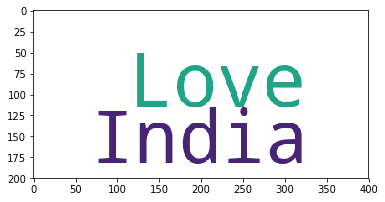

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white').generate('I Love India')
plt.imshow(wc)

In [ ]:
# JOin function to join all the rows to pass into wordcloud -> ''.join()

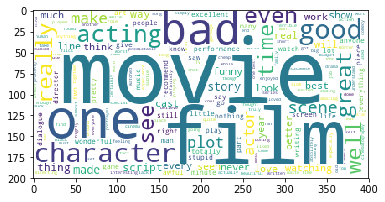

In [18]:
input_string = ''.join(imdb['review'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

#### These words become feature for the algorithm so there is the necessity to remove the stop words.

### Text Cleaning:
    - Convert everything to lower case
    - Remove Junk characters
    - Remove commonly used words
    - Identify root of the words (play,played,playing,plays)->play -- process is called Stemming
    - For Unsupervised , NO CLEANING directly feed most of the cases

In [19]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]','')
docs.head()
#Used for text classification ,alphabets and space here,hashtag and @ for twitter

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
2    attempting artiness with black  white and clev...
3          very little music or anything to speak of  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords #-> It is a python list
len(stopwords)
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [32]:
docs_clean=[]
for doc in docs.head(2):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean =[]
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean = ' '.join(words_clean) # joining back the words
    docs_clean.append(doc_clean) # appending it to docs_clean()
    
    #print(words_clean)
    #print('----------')
print(docs_clean)

['slowmov aimless movi distress drift young man  ', 'sure lost  flat charact audienc nearli half walk  ']


In [29]:
# Stemming
stemmer = nltk.stem.PorterStemmer() # Apply stemming in the previous for loop , print stemmed words instead of word.
stemmer.stem('')

'do'

In [33]:
## Function
docs = imdb['review'].str.lower().str.replace('[^a-z ]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

#### Vector Representation
    -->Rows are vector representation of Documents 
    -->Row sum tells frequency of a terms(words) in all documents - Document Length
    -->Every Column is a vector representation of Terms (freq of a term in a documents)
    -->Column sum Total frequency of a term across all the documents
    -->Sparse Matrix (Most of the values will be 0,less non zero columns)
    -->Sparsity = [No.of.Zeros / No.of.Rows x No.of.Columns]
    -->High dimension data
    -->Can also find correlation between 2 documents and 2 terms (b/w D1 and D2) ,(b/w T1 and T2)

### Document Term Matrix

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm 
# No.of rows 748 , No.of.columns 2475 in DTM
# Will not give the matrix format by default

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [36]:
no_of_zeros = (748*2475)-6797
sparsity = no_of_zeros /(748*2475)*100
sparsity

99.63285259007183

In [39]:
df_dtm = pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names()) #.toarray() To display the DTM and column names dont come by default
df_dtm


,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,younger,your,youth,youtub,youv,yun,zillion,zombi,zombiestud,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Number of zeros
(df_dtm == 0).sum().sum()

1844503

In [43]:
df_dtm.sum().sort_values(ascending = False).head(20)

movi       207
film       184
one         79
bad         67
like        59
charact     58
good        56
time        49
watch       48
act         46
see         43
great       41
realli      41
even        39
love        37
make        33
scene       33
stori       32
well        31
look        29
dtype: int64

In [44]:
df_dtm.sum(axis =1).sort_values(ascending=False).head(10) # Row wise sum
# 136 document has largest number of terms , collection of terms is called corpus

136    686
19     425
646    408
149    131
135    107
422     41
192     37
223     34
271     31
230     29
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
train_x,test_x = train_test_split(df_dtm,test_size=0.2,random_state = 100)

In [46]:
train_x

,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,younger,your,youth,youtub,youv,yun,zillion,zombi,zombiestud,zombiez
161,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_y = imdb.iloc[train_x.index]['sentiment']
test_y = imdb.iloc[test_x.index]['sentiment']

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=100,n_estimators=100)
rf_model.fit(train_x,train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y,rf_predict_class)

0.72

In [68]:
rf_modell = MultinomialNB()
rf_modell.fit(train_x,train_y)
rf_predict_classs = rf_modell.predict(test_x)
accuracy_score(test_y,rf_predict_classs)

#Gaussian will have accuracy of 59% on the data since it assumes normality distribution of data

0.7733333333333333

### *** Naive Bayes can be used for better accuracy ( smaller data NB works better)

#### Sentence level probability to word level probability ignoring stop words
#### No dependency between features assumed
#### P(You won lottery worth 10 crores|spam)=P(you|spam),P(won|spam),P(lottery|spam),P(worth|spam),P(crore|spam)


### Hotstar Sentiments DataSet

In [49]:
hs = pd.read_csv('E:/Term3/Unstructured/hotstar.allreviews_Sentiments.csv')
hs.head(5)

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [61]:
docs = hs['Lower_Case_Reviews'].str.lower().str.replace('[^a-z ]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0                                                   hh
1                                                     
2    hotstarhelp paymnt premium subscript transact ...
3    hotstartweet current jio network would like kn...
4    hotstartweet episod sarabhai vs sarabhai seaso...
Name: Lower_Case_Reviews, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [52]:
df_dtm_hs = pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())

In [53]:
from sklearn.model_selection import train_test_split
trainx,testx = train_test_split(df_dtm_hs,test_size=0.2,random_state = 100)

In [54]:
trainx

,aa,aaaaaand,aaaaah,aab,aabe,aacikelqcgv,aadat,aadhaar,aadhaarmem,aadhitamizhan,...,zeemoham,zeetv,zero,zinab,zindabad,ziuoubngwejxo,zmilap,znmd,zombi,zzzune
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
trainy = hs.iloc[trainx.index]['Sentiment_Manual']
testy = hs.iloc[testx.index]['Sentiment_Manual']

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model1 = RandomForestClassifier(random_state=100,n_estimators=100)
rf_model1.fit(trainx,trainy)
rf_predict_class1 = rf_model1.predict(testx)
accuracy_score(testy,rf_predict_class1)

0.7260138476755688

### Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(trainx,trainy)
mnb.predict = mnb.predict(testx)
accuracy_score(testy,mnb.predict)

0.7359050445103857

## TF-IDF Vectorization

#### Domain specific words appear in the documents , to remove those words also use TF-IDF method.
    -Reduce the weightage to the domain specific words in the document. 
    -IDF (T1) = log(No.of.Documents)/(No.of.docs which T1 is appearing)-> log(4/1)=1.38
    -IDF(T2) = log(4/4) = 0

    -TF T1->1,T2->6
    -IDF T1->1.38,T2->0

    -Multiply IDF x TF for every cell
    -Divide it by Document length for every cell (Documents size could differ)[Normalization]

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

train,test = train_test_split(docs_clean,test_size = 0.2,random_state = 100)
tfidf = TfidfVectorizer()
tfidf.fit(train)
train_dtm_tfidf = tfidf.transform(train)
test_dtm_tfidf = tfidf.transform(test)

df_train_tfidf = pd.DataFrame(train_dtm_tfidf.toarray(),columns=tfidf.get_feature_names())
df_test_tfidf = pd.DataFrame(test_dtm_tfidf.toarray(),columns=tfidf.get_feature_names())
df_train_tfidf

,aa,aaaaaand,aabe,aacikelqcgv,aadat,aadhaar,aag,aahthoo,aaj,aajata,...,zee,zeekannada,zeemoham,zeetv,zero,zindabad,zmilap,znmd,zombi,zzzune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trainy = hs.iloc[df_train_tfidf.index]['Sentiment_Manual']
testy = hs.iloc[df_test_tfidf.index]['Sentiment_Manual']

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=100,n_estimators=100)
rf_model.fit(trainx,trainy)
rf_predict_class1 = rf_model.predict(testx)
accuracy_score(testy,rf_predict_class1)

0.7260138476755688

## -------------------------------------------------------------------------------------

### Exercise : Tweets Clustering

In [75]:
modi = pd.read_csv('E:/Term3/Unstructured/narendramodi_tweets.csv')

In [76]:
modi.head(5)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [ ]:
## Using Modi tweets data , identify minimum and maximum date from created_at column

In [79]:
print(modi['created_at'].min())
print(modi['created_at'].max())

2016-03-09 12:22:10
2017-01-31 11:00:07


In [ ]:
##  Create wordcloud uding all the rows from text column

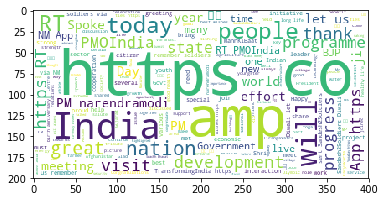

In [80]:
input_string = ''.join(modi['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

In [ ]:
# clean the text column : convert all the charaters to lower case
# apply regex expression to retain only alphabets , # , @ and spaces
# remove stop words
# apply stemming

In [87]:
docs_modi = modi['text'].str.lower().str.replace('[^a-z#@ ]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean_modi = docs_modi.apply(clean_sentence)
docs_clean_modi.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2       rt @pmoindia empow marginalis httpstcowwsqgwdk
3    rt @pmoindia commit welfar farmer httpstcopaaf...
4    rt @pmoindia improv qualiti life poor httpstco...
Name: text, dtype: object

In [ ]:
## Create the DocumentTermMatrix using CountVectorizer;set min_df = 5 
## use kmeans algo , cluster the tweets into 4 groups
## create word cloud for each group

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 5)
vectorizer.fit(docs_clean_modi)
dtm_modi = vectorizer.transform(docs_clean_modi)
dtm_modi

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dtm_modi)
kmeans.labels_


array([1, 1, 2, ..., 1, 1, 3])

In [93]:
labels = kmeans.predict(dtm_modi)
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[1 1 2 ... 1 1 3]
[[0.00381679 0.         0.         ... 0.01145038 0.03053435 0.00381679]
 [0.00222222 0.00222222 0.00555556 ... 0.01333333 0.02222222 0.00222222]
 [0.00436681 0.         0.         ... 0.         0.00436681 0.        ]
 [0.00109349 0.00218699 0.00164024 ... 0.00710771 0.00765446 0.00164024]]


In [103]:
Df = pd.DataFrame({'text':docs_clean_modi, 'Cluster':labels})

In [104]:
Df.head()

,Cluster,text
0,1,presid address wonder encapsul india strength ...
1,1,rashtrapati ji address hous parliament indepth...
2,2,rt @pmoindia empow marginalis httpstcowwsqgwdk
3,2,rt @pmoindia commit welfar farmer httpstcopaaf...
4,2,rt @pmoindia improv qualiti life poor httpstco...


In [105]:
c1 = Df.query('Cluster==1')
c1

,Cluster,text
0,1,presid address wonder encapsul india strength ...
1,1,rashtrapati ji address hous parliament indepth...
8,1,rt @rashtrapatibhvn proactiv act east polici g...
9,1,rt @rashtrapatibhvn standup india initi govt p...
10,1,rt @rashtrapatibhvn pradhan mantri fasal bima ...
20,1,get ebook tensionfre exam amp personalis exam ...
22,1,@ndrfhq rightli focuss strengthen system proce...
23,1,greet @ndrfhq team th rais day celebr ndrf eff...
32,1,#mannkibaat student #stressfreeexam import kno...
34,1,meet ncc cadet give glimps skill amp potenti y...


In [111]:
c2 = Df.query('Cluster==2')
#c2

In [110]:
c3 = Df.query('Cluster==3')
#c3

In [115]:
c4 = Df.query('Cluster==0')
#c4

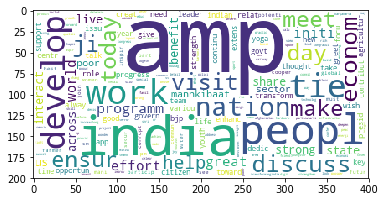

In [108]:
input_string = ''.join(c1['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

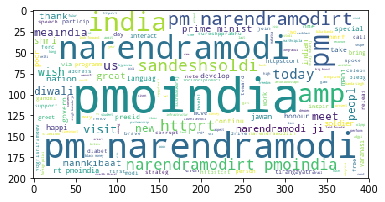

In [112]:
input_string = ''.join(c2['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

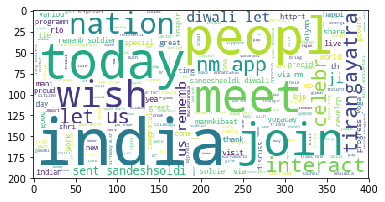

In [113]:
input_string = ''.join(c3['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

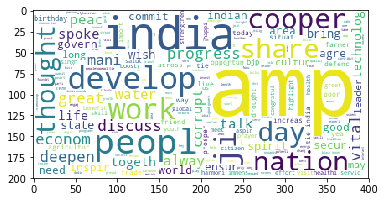

In [116]:
input_string = ''.join(c4['text'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)